In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("../../../data/processed/final_dataset.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price
0,HP,AMD Ryzen 5 5500U,13144.0,Intel UHD Graphics,1476.0,17.3,1920,1080,32.0,512.0,Windows 11,1.77,733.50
1,HP,Intel Core i7 1165G7 2.80GHz,10346.0,Intel Iris Xe,2690.0,15.6,1920,1080,12.0,256.0,Windows 11,1.77,886.78
2,HP,Intel Core i3 1115G4 3.00GHz,6132.0,Intel UHD Graphics,1476.0,15.6,1920,1080,8.0,256.0,Windows 10,2.00,375.00
3,HP,Intel Core i5 4302Y 1.60GHz,2028.0,Intel UHD Graphics,1476.0,12.5,1366,768,8.0,256.0,Windows 10,0.98,209.98
4,HP,Intel Core i9 13900H,29690.0,Intel Iris Pro Graphics 6200,1449.0,16.0,3840,2400,64.0,2048.0,Windows 11,1.75,4816.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           9205 non-null   object 
 1   CPU Name        9205 non-null   object 
 2   CPU Mark        9205 non-null   float64
 3   GPU Name        9205 non-null   object 
 4   GPU Mark        9205 non-null   float64
 5   Monitor         9205 non-null   float64
 6   Width           9205 non-null   int64  
 7   Height          9205 non-null   int64  
 8   RAM             9205 non-null   float64
 9   Storage Amount  9205 non-null   float64
 10  OS              9205 non-null   object 
 11  Weight          9205 non-null   float64
 12  Price           9205 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 935.0+ KB


In [4]:
df_filtered = df

In [5]:
df_filtered["Brand"] = df_filtered["Brand"].apply(lambda x: x.lower())

In [6]:
brands = df["Brand"].value_counts()
df_filtered = df[df["Brand"].isin(brands[brands>7].index.tolist())]

In [7]:
df_filtered["Brand"] = df_filtered["Brand"].replace({
    "gigabyte": "other",
    "razer": "other",
    "rokc": "other",
    "best notebooks": "other"
})
df_filtered["Brand"].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2312\246968896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Brand"] = df_filtered["Brand"].replace({


dell         2177
lenovo       1959
hp           1933
asus          817
acer          753
msi           557
apple         337
microsoft     210
lg            165
samsung        96
other          89
panasonic      45
Name: Brand, dtype: int64

In [8]:
df_filtered["CPU Brand"] = df_filtered["CPU Name"].str.split().apply(lambda x: x[0].lower())

C:\Users\DELL\AppData\Local\Temp\ipykernel_2312\2812099673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["CPU Brand"] = df_filtered["CPU Name"].str.split().apply(lambda x: x[0].lower())


In [1]:
id2 = df_filtered["CPU Brand"].value_counts()
df_filtered = df_filtered[df_filtered["CPU Brand"].isin(id2[id2> 22].index)]

NameError: name 'df_filtered' is not defined

In [10]:
df_filtered["GPU Brand"] = df_filtered["GPU Name"].str.split().apply(lambda x: x[0].lower())

In [ ]:
id3 = df_filtered["GPU Brand"].value_counts()
df_filtered = df_filtered[df_filtered["GPU Brand"].isin(id3[id3>5].index)]
df_filtered = df_filtered[df_filtered["Monitor"]>10.5]
df_filtered = df_filtered[df_filtered["Monitor"]<20]
df_filtered = df_filtered[df_filtered["Width"]>100]
df_filtered = df_filtered[df_filtered["Width"]>1300]
df_filtered = df_filtered[df_filtered["RAM"]>3]
df_filtered = df_filtered[df_filtered["Storage Amount"]>=32]
df_filtered = df_filtered[df_filtered["Storage Amount"]<16000]
df_filtered = df_filtered[df_filtered["Weight"]<7.1]
df_filtered = df_filtered[df_filtered["Weight"]>0.3]
df_filtered = df_filtered[df_filtered["Price"]>150]
df_filtered = df_filtered[df_filtered["Price"]<6500]

In [ ]:
df_filtered = df_filtered[df_filtered["Monitor"]>10.5]

In [ ]:
df_filtered = df_filtered[df_filtered["Monitor"]<20]

In [ ]:
df_filtered = df_filtered[df_filtered["Width"]>100]

In [15]:
df_filtered = df_filtered[df_filtered["Width"]>1300]

In [16]:
df_filtered = df_filtered[df_filtered["RAM"]>3]

In [17]:
df_filtered = df_filtered[df_filtered["Storage Amount"]>=32]
df_filtered = df_filtered[df_filtered["Storage Amount"]<16000]

In [18]:
df_filtered = df_filtered[df_filtered["Weight"]<7.1]
df_filtered = df_filtered[df_filtered["Weight"]>0.3]

In [19]:
df_filtered = df_filtered[df_filtered["Price"]>150]
df_filtered = df_filtered[df_filtered["Price"]<6500]

In [20]:
df_filtered.head(2)

,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price,CPU Brand,GPU Brand
0,hp,AMD Ryzen 5 5500U,13144.0,Intel UHD Graphics,1476.0,17.3,1920,1080,32.0,512.0,Windows 11,1.77,733.50,amd,intel
1,hp,Intel Core i7 1165G7 2.80GHz,10346.0,Intel Iris Xe,2690.0,15.6,1920,1080,12.0,256.0,Windows 11,1.77,886.78,intel,intel


In [21]:
df_filtered.describe()

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Weight,Price
count,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000
mean,16505.784305,6584.729372,15.142377,2035.640471,1196.026009,20.444058,827.458296,1.958095,1247.164234
std,9773.379764,7619.422508,1.215992,465.530035,319.044850,23.200859,834.502436,0.703838,847.025784
min,86.000000,2.000000,10.600000,1360.000000,600.000000,4.000000,32.000000,0.320000,152.990000
25%,9891.000000,1476.000000,14.000000,1920.000000,1080.000000,8.000000,500.000000,1.550000,669.790000
50%,15348.000000,2690.000000,15.600000,1920.000000,1080.000000,16.000000,512.000000,1.770000,1009.990000
75%,23276.000000,11706.000000,15.600000,1920.000000,1200.000000,32.000000,1024.000000,2.260000,1599.957500
max,61425.000000,38874.000000,19.500000,3840.000000,2400.000000,1024.000000,8192.000000,7.060000,6499.000000


In [22]:
df_filtered["GPU Brand"].value_counts()

intel       5030
geforce     2392
radeon       842
ryzen        197
nvidia       172
rtx          160
quadro        61
256mb         36
geforce2      15
t500           8
t550           7
Name: GPU Brand, dtype: int64

In [23]:
df_filtered["GPU Brand"].replace("256mb", "radeon", inplace=True)
df_filtered["GPU Brand"].value_counts()

intel       5030
geforce     2392
radeon       878
ryzen        197
nvidia       172
rtx          160
quadro        61
geforce2      15
t500           8
t550           7
Name: GPU Brand, dtype: int64

In [24]:
df_filtered["GPU Brand"].replace("t550", "t500", inplace=True)
df_filtered["GPU Brand"].replace("geforce3", "geforce", inplace=True)

In [25]:
df_filtered.drop("CPU Name", axis=1, inplace=True)
df_filtered.drop("GPU Name", axis=1, inplace=True)

In [26]:
df_filtered["OS"] = df_filtered["OS"].replace({
    "ChromeOS": "Chrome OS",
    "No OS": "Windows 10",
    "Windows 8.1": "Windows 8"
})

df_filtered["OS"].value_counts()

Windows 11             4605
Windows 10             4004
Chrome OS               246
Windows 7                21
Windows 8                21
MacOS                     5
Google Chrome             5
Windows 1                 2
Windows Vista             2
Windows 1012              1
Ubuntu Linux 18.04        1
OS X 10.10 Yosemite       1
Windows 108               1
Windows 14                1
Windows Pro               1
Linux                     1
Windows 1111              1
Ubuntu Linux 20.04        1
Name: OS, dtype: int64

In [27]:
id4 = df_filtered["OS"].value_counts()
df_filtered = df_filtered[df_filtered["OS"].isin(id4[id4>5].index)]

In [28]:
df_filtered[df_filtered["Brand"]=="apple"]["OS"].value_counts()

Windows 10    328
Name: OS, dtype: int64

In [29]:
df_filtered.loc[df_filtered["Brand"] == "apple", "OS"] = "MacOS"

In [30]:
new_df = df_filtered

In [31]:
new_df.to_csv("processed_final_dataset.csv")

In [32]:
# new_df.drop(["CPU Name", "GPU Name"], axis=1, inplace=True)

In [ ]:
new_df = pd.get_dummies(new_df, columns=["Brand"])
new_df = pd.get_dummies(new_df, columns=["OS"])
new_df = pd.get_dummies(new_df, columns=["CPU Brand"])
new_df = pd.get_dummies(new_df, columns=["GPU Brand"])

In [34]:
new_df = pd.get_dummies(new_df, columns=["OS"])

In [35]:
new_df = pd.get_dummies(new_df, columns=["CPU Brand"])

In [36]:
new_df = pd.get_dummies(new_df, columns=["GPU Brand"])

In [37]:
new_df

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Weight,Price,Brand_acer,...,CPU Brand_intel,GPU Brand_geforce,GPU Brand_geforce2,GPU Brand_intel,GPU Brand_nvidia,GPU Brand_quadro,GPU Brand_radeon,GPU Brand_rtx,GPU Brand_ryzen,GPU Brand_t500
0,13144.0,1476.0,17.3,1920,1080,32.0,512.0,1.77,733.50,0,...,0,0,0,1,0,0,0,0,0,0
1,10346.0,2690.0,15.6,1920,1080,12.0,256.0,1.77,886.78,0,...,1,0,0,1,0,0,0,0,0,0
2,6132.0,1476.0,15.6,1920,1080,8.0,256.0,2.00,375.00,0,...,1,0,0,1,0,0,0,0,0,0
3,2028.0,1476.0,12.5,1366,768,8.0,256.0,0.98,209.98,0,...,1,0,0,1,0,0,0,0,0,0
4,29690.0,1449.0,16.0,3840,2400,64.0,2048.0,1.75,4816.61,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,9891.0,926.0,15.6,1920,1080,32.0,1024.0,1.88,572.09,0,...,1,0,0,1,0,0,0,0,0,0
9201,2443.0,4253.0,13.0,1920,1080,16.0,256.0,0.77,999.99,0,...,1,0,0,1,0,0,0,0,0,0
9202,23805.0,3013.0,14.2,3024,1964,36.0,4096.0,1.60,3599.00,0,...,0,0,0,1,0,0,0,0,0,0
9203,12421.0,926.0,14.0,1920,1080,16.0,256.0,1.77,515.00,0,...,1,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

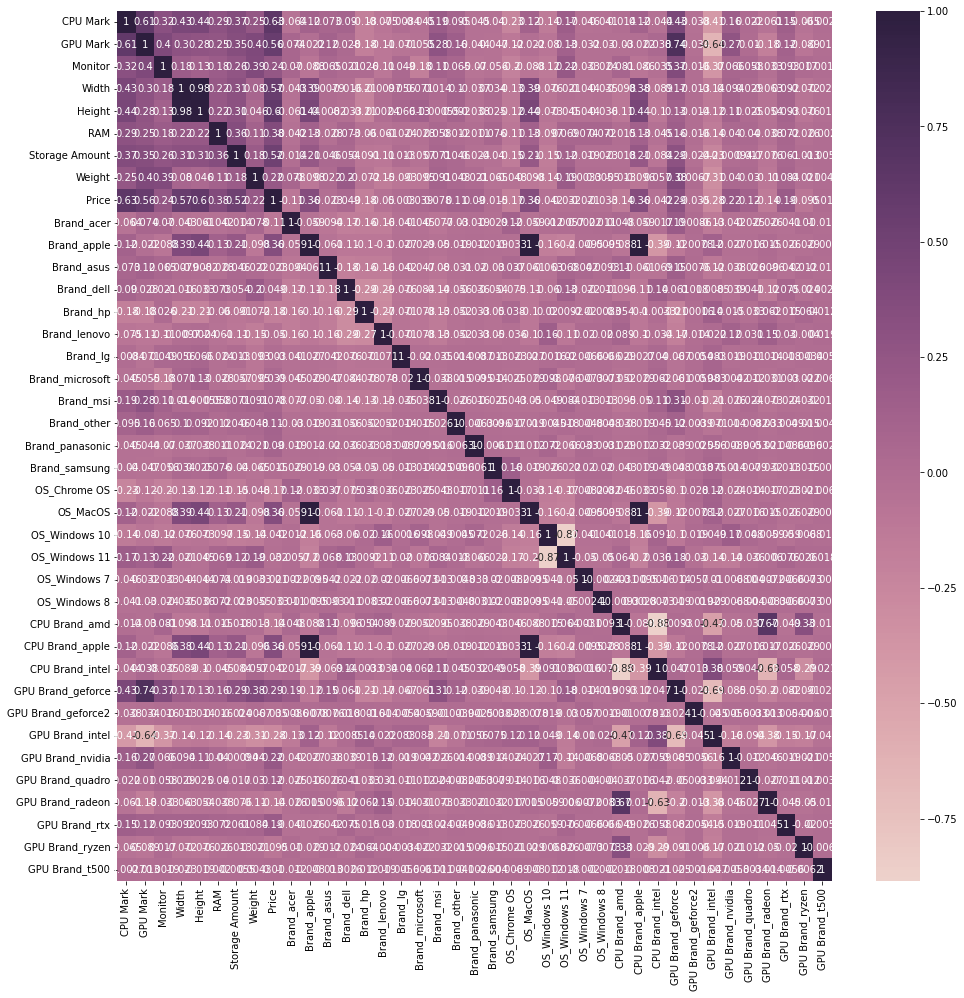

In [38]:
plt.figure(figsize=(16,16))
sn.heatmap(new_df.corr(), annot=True, cmap=sn.cubehelix_palette(as_cmap=True))

In [59]:
target_corr = new_df.corr()["Price"].apply(abs).sort_values()
target_corr

Brand_lg              0.003023
GPU Brand_t500        0.010487
Brand_samsung         0.014548
OS_Windows 7          0.021137
Brand_asus            0.022564
OS_Windows 11         0.032125
OS_Windows 8          0.032776
GPU Brand_geforce2    0.035290
Brand_microsoft       0.039481
CPU Brand_intel       0.041926
OS_Windows 10         0.042235
Brand_dell            0.048848
Brand_lenovo          0.049745
Brand_msi             0.077610
Brand_panasonic       0.089868
GPU Brand_ryzen       0.095086
Brand_other           0.107119
Brand_acer            0.107526
GPU Brand_quadro      0.116772
CPU Brand_amd         0.136203
GPU Brand_radeon      0.140908
OS_Chrome OS          0.171743
Brand_hp              0.175391
GPU Brand_rtx         0.186856
GPU Brand_nvidia      0.221532
Weight                0.222223
Monitor               0.244310
GPU Brand_intel       0.276649
GPU Brand_geforce     0.291670
Brand_apple           0.358882
OS_MacOS              0.358882
CPU Brand_apple       0.358976
RAM     

In [60]:
selected_features = list(target_corr[-17:].index)
selected_features

['Brand_hp',
 'GPU Brand_rtx',
 'GPU Brand_nvidia',
 'Weight',
 'Monitor',
 'GPU Brand_intel',
 'GPU Brand_geforce',
 'Brand_apple',
 'OS_MacOS',
 'CPU Brand_apple',
 'RAM',
 'Storage Amount',
 'GPU Mark',
 'Width',
 'Height',
 'CPU Mark',
 'Price']

In [61]:
limited_df = new_df[selected_features]
limited_df

,Brand_hp,GPU Brand_rtx,GPU Brand_nvidia,Weight,Monitor,GPU Brand_intel,GPU Brand_geforce,Brand_apple,OS_MacOS,CPU Brand_apple,RAM,Storage Amount,GPU Mark,Width,Height,CPU Mark,Price
0,1,0,0,1.77,17.3,1,0,0,0,0,32.0,512.0,1476.0,1920,1080,13144.0,733.50
1,1,0,0,1.77,15.6,1,0,0,0,0,12.0,256.0,2690.0,1920,1080,10346.0,886.78
2,1,0,0,2.00,15.6,1,0,0,0,0,8.0,256.0,1476.0,1920,1080,6132.0,375.00
3,1,0,0,0.98,12.5,1,0,0,0,0,8.0,256.0,1476.0,1366,768,2028.0,209.98
4,1,0,0,1.75,16.0,1,0,0,0,0,64.0,2048.0,1449.0,3840,2400,29690.0,4816.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,0,0,0,1.88,15.6,1,0,0,0,0,32.0,1024.0,926.0,1920,1080,9891.0,572.09
9201,0,0,0,0.77,13.0,1,0,0,0,0,16.0,256.0,4253.0,1920,1080,2443.0,999.99
9202,0,0,0,1.60,14.2,1,0,1,1,1,36.0,4096.0,3013.0,3024,1964,23805.0,3599.00
9203,0,0,0,1.77,14.0,1,0,0,0,0,16.0,256.0,926.0,1920,1080,12421.0,515.00


<AxesSubplot:>

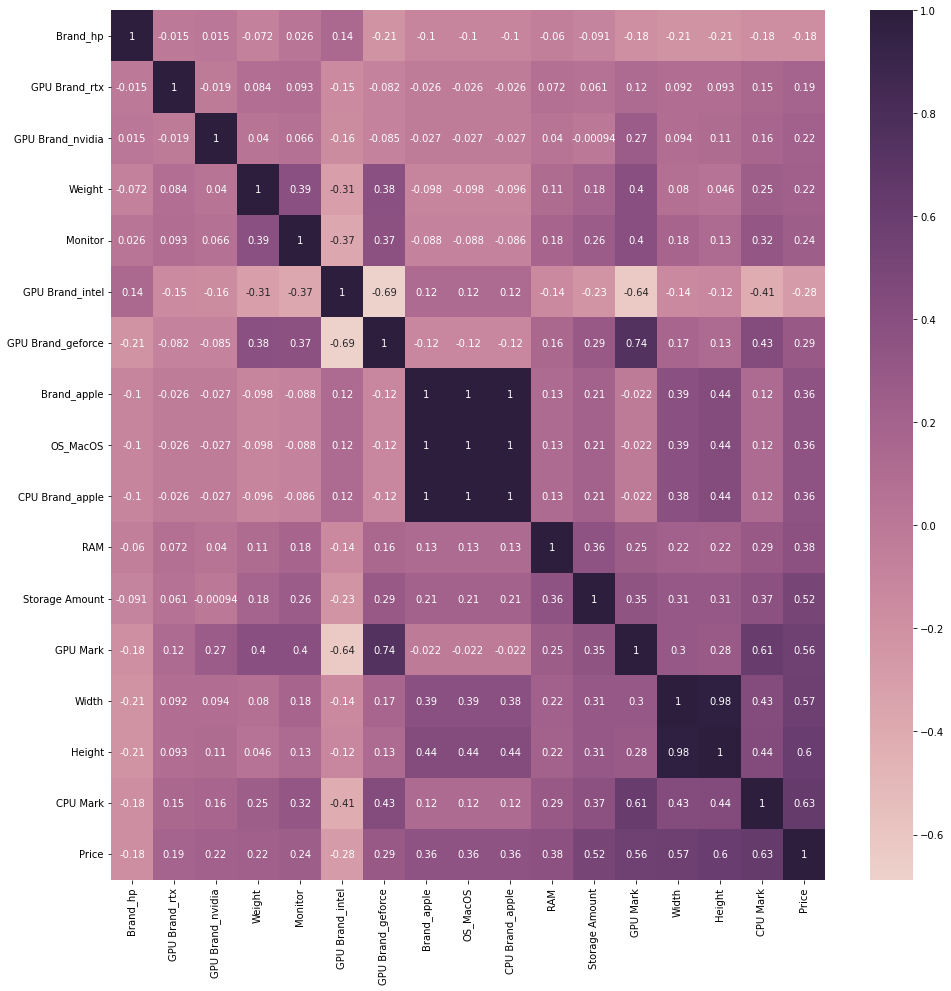

In [62]:
plt.figure(figsize=(16,16))
sn.heatmap(limited_df.corr(), annot=True, cmap=sn.cubehelix_palette(as_cmap=True))

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import joblib
import warnings
warnings.filterwarnings("ignore")

In [65]:
X, y = limited_df.drop("Price", axis=1), limited_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [66]:
pd.set_option('display.max_columns', None)
X_train

,Brand_hp,GPU Brand_rtx,GPU Brand_nvidia,Weight,Monitor,GPU Brand_intel,GPU Brand_geforce,Brand_apple,OS_MacOS,CPU Brand_apple,RAM,Storage Amount,GPU Mark,Width,Height,CPU Mark
5672,1,0,0,1.77,15.6,1,0,0,0,0,16.0,512.0,1476.0,1366,768,3855.0
3349,0,0,0,2.82,15.6,0,1,0,0,0,8.0,256.0,12961.0,1920,1080,15084.0
1181,0,0,0,2.55,14.0,1,0,0,0,0,8.0,480.0,324.0,1366,768,2542.0
8798,1,0,0,2.22,17.3,0,0,0,0,0,32.0,1024.0,12984.0,1920,1080,13144.0
5288,0,0,0,2.50,15.6,0,1,0,0,0,32.0,1024.0,19560.0,1920,1200,32140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,1,1.86,16.0,0,0,0,0,0,32.0,1024.0,22064.0,2560,1600,29690.0
7681,1,0,0,1.55,12.5,1,0,0,0,0,8.0,256.0,1476.0,1366,768,2999.0
7445,0,0,0,2.30,15.6,0,1,0,0,0,16.0,1024.0,25351.0,1920,1080,22681.0
6334,0,0,0,1.84,16.0,1,0,0,0,0,16.0,512.0,1971.0,1920,1200,15451.0


In [67]:
columns_to_scale = ["Weight", "Monitor", "RAM", "Storage Amount", "GPU Mark", "Width", "Height", "CPU Mark"]
scaler = StandardScaler()
# X_train_scalered = scaler.fit_transform(X_train)
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])


# X_test_scalered = scaler.fit_transform(X_test)
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.fit_transform(X_test_scaled[columns_to_scale])

In [ ]:
def train_model(X_train, y_train, model_name: str, grid_search=False):
    
    
    if model_name=='KNN':
        if grid_search==True:
            param_grid = {
                'n_neighbors': [3, 5, 7, 9, 11],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

            knn = KNeighborsRegressor()
            grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)

            print("Best Params:", grid_search.best_params_)
            print("Best Score:", -grid_search.best_score_)

            return grid_search.best_estimator_
        
        else:
            knn = KNeighborsRegressor()
            knn.fit(X_train, y_train)

            return knn

In [69]:
def predict(model: LinearSVR, X_test, y_test):
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred))

    plt.figure(figsize=(16,16))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Prediction")
    plt.ylabel("Actual Value")
    plt.plot(range(0,7000), range(0,7000), c='red')
    plt.show()

In [70]:
X_test_scaled.describe()

,Brand_hp,GPU Brand_rtx,GPU Brand_nvidia,Weight,Monitor,GPU Brand_intel,GPU Brand_geforce,Brand_apple,OS_MacOS,CPU Brand_apple,RAM,Storage Amount,GPU Mark,Width,Height,CPU Mark
count,1780.000000,1780.000000,1780.000000,1.780000e+03,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03
mean,0.225281,0.020225,0.015730,3.128584e-16,-1.007933e-16,0.555056,0.273596,0.032022,0.032022,0.032022,2.794269e-17,-4.390994e-17,-6.985673e-18,-1.636643e-16,2.335211e-16,-4.590585e-17
std,0.417885,0.140808,0.124465,1.000281e+00,1.000281e+00,0.497099,0.445929,0.176109,0.176109,0.176109,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00
min,0.000000,0.000000,0.000000,-2.097600e+00,-3.771984e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-5.737166e-01,-9.671493e-01,-8.739360e-01,-1.388237e+00,-1.299105e+00,-1.675901e+00
25%,0.000000,0.000000,0.000000,-5.901131e-01,-9.566610e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-4.352795e-01,-3.884952e-01,-6.755046e-01,-2.170423e-01,-3.286269e-01,-6.543347e-01
50%,0.000000,0.000000,0.000000,-2.749114e-01,3.681970e-01,1.000000,0.000000,0.000000,0.000000,0.000000,-1.584054e-01,-3.736579e-01,-5.118525e-01,-2.170423e-01,-3.286269e-01,-9.127310e-02
75%,0.000000,0.000000,0.000000,3.966053e-01,3.681970e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.184687e-01,2.593997e-01,4.979641e-01,-2.170423e-01,4.463404e-02,7.423628e-01
max,1.000000,1.000000,1.000000,6.476297e+00,2.769502e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.472773e+01,9.122205e+00,4.365895e+00,3.798483e+00,3.777244e+00,4.120628e+00


In [71]:
def evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Percentage Error: {mape:.2f}%')

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
def save_model(model, model_name):
    filename = f"{model_name}_model.pkl"
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

172551.65376066157


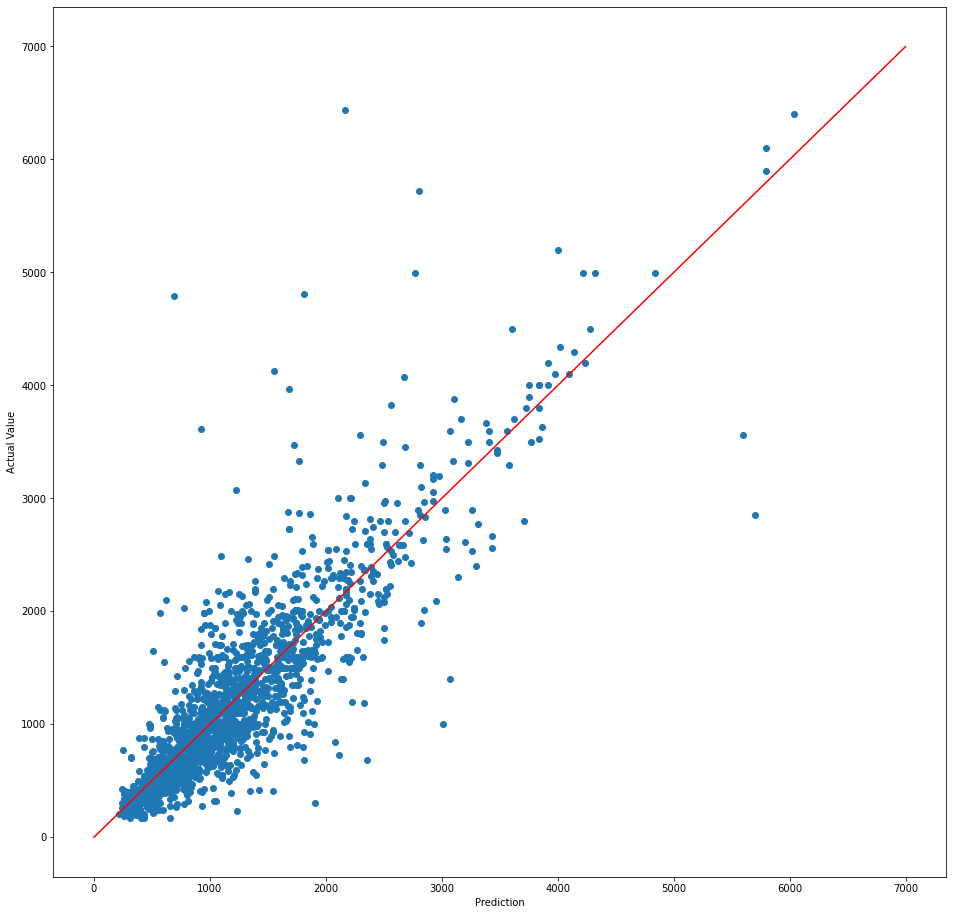

Mean Squared Error: 172551.65
Mean Absolute Percentage Error: 25.71%


In [ ]:
MODEL_NAME = 'KNN'
GRID_SEARCH = False

trained_model = train_model(X_train=X_train_scaled, y_train=y_train, model_name=MODEL_NAME, grid_search=GRID_SEARCH)
predict(model=trained_model, X_test=X_test_scaled, y_test=y_test)
evaluation(model=trained_model, X_test=X_test_scaled, y_test=y_test)
# save_model(train_model, "knn_default.pkl")

Best Params: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 151526.58504486218
156639.73134304586


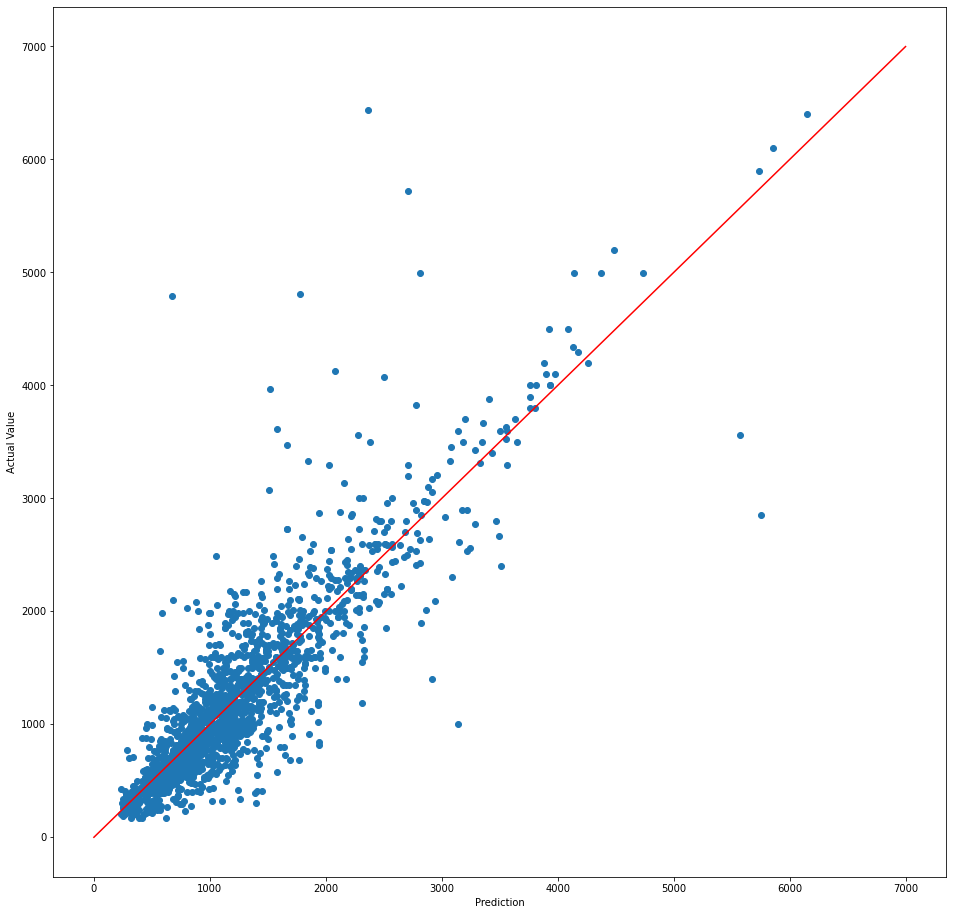

Mean Squared Error: 156639.73
Mean Absolute Percentage Error: 24.39%
Model saved as knn_gridsearch.pkl_model.pkl


In [74]:
MODEL_NAME = 'KNN'
GRID_SEARCH = True

trained_model = train_model(X_train=X_train_scaled, y_train=y_train, model_name=MODEL_NAME, grid_search=GRID_SEARCH)

predict(model=trained_model, X_test=X_test_scaled, y_test=y_test)
evaluation(model=trained_model, X_test=X_test_scaled, y_test=y_test)
save_model(train_model, "knn_gridsearch.pkl")

In [75]:
X_test

,Brand_hp,GPU Brand_rtx,GPU Brand_nvidia,Weight,Monitor,GPU Brand_intel,GPU Brand_geforce,Brand_apple,OS_MacOS,CPU Brand_apple,RAM,Storage Amount,GPU Mark,Width,Height,CPU Mark
8525,0,0,0,1.78,15.6,0,1,0,0,0,16.0,512.0,7320.0,1920,1080,2350.0
1000,0,0,0,2.14,13.3,0,0,0,0,0,4.0,32.0,2040.0,1920,1080,3292.0
1558,0,0,0,2.68,15.6,1,0,0,0,0,8.0,256.0,926.0,1920,1080,13554.0
8597,0,0,0,1.18,13.4,1,0,0,0,0,16.0,1000.0,1476.0,1920,1200,23276.0
1803,0,0,0,1.12,15.6,1,0,0,0,0,16.0,1024.0,2690.0,1920,1080,10346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,0,0,0,1.68,16.0,1,0,0,0,0,40.0,1024.0,1476.0,1920,1200,17229.0
8938,0,0,0,2.37,15.6,1,0,0,0,0,8.0,256.0,1476.0,1366,768,10641.0
5090,0,0,0,1.60,14.2,1,0,1,1,1,36.0,512.0,6010.0,3024,1964,23805.0
570,0,0,0,0.45,14.0,0,1,0,0,0,16.0,512.0,5051.0,1920,1080,3052.0


In [76]:
X_test_scaled

,Brand_hp,GPU Brand_rtx,GPU Brand_nvidia,Weight,Monitor,GPU Brand_intel,GPU Brand_geforce,Brand_apple,OS_MacOS,CPU Brand_apple,RAM,Storage Amount,GPU Mark,Width,Height,CPU Mark
8525,0,0,0,-0.274911,0.368197,0,1,0,0,0,-0.158405,-0.373658,0.112290,-0.217042,-0.328627,-1.441223
1000,0,0,0,0.218448,-1.536286,0,0,0,0,0,-0.573717,-0.967149,-0.599475,-0.217042,-0.328627,-1.342927
1558,0,0,0,0.958487,0.368197,1,0,0,0,0,-0.435280,-0.690187,-0.749647,-0.217042,-0.328627,-0.272108
8597,0,0,0,-1.097177,-1.453483,1,0,0,0,0,-0.158405,0.229725,-0.675505,-0.217042,0.044634,0.742363
1803,0,0,0,-1.179403,0.368197,1,0,0,0,0,-0.158405,0.259400,-0.511853,-0.217042,-0.328627,-0.606856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,0,0,0,-0.411956,0.699412,1,0,0,0,0,0.672217,0.259400,-0.675505,-0.217042,0.044634,0.111371
8938,0,0,0,0.533650,0.368197,1,0,0,0,0,-0.435280,-0.690187,-0.675505,-1.375689,-1.299105,-0.576074
5090,0,0,0,-0.521591,-0.791054,1,0,1,1,1,0.533780,-0.373658,-0.064303,2.091885,2.421062,0.797563
570,0,0,0,-2.097600,-0.956661,0,1,0,0,0,-0.158405,-0.373658,-0.193580,-0.217042,-0.328627,-1.367970


<AxesSubplot:>

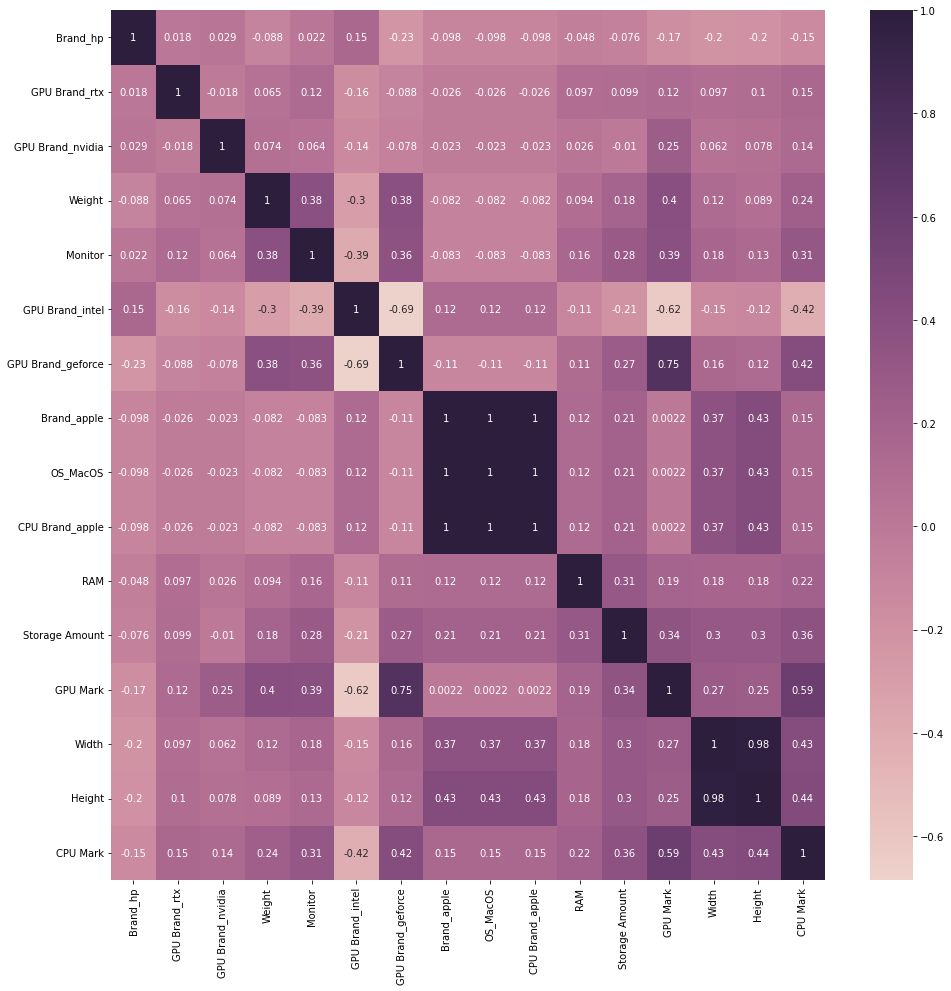

In [77]:
plt.figure(figsize=(16,16))
sn.heatmap(X_test.corr(), annot=True, cmap=sn.cubehelix_palette(as_cmap=True))